In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap = 'Greens');
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Lose', 'Win']); ax.yaxis.set_ticklabels(['Lose', 'Win']) 
    plt.show() 

This function will be used to create a confusion matrix to determine the success of our models.

In [4]:
hurts_df = pd.read_csv('/Users/noah/Desktop/Player Efficiency Analysis/CSV/hurts_dataset2.csv')
hurts_df.head()

,Rank,Year,Date,Week,Team,H/A,Opp,Result,Status,Pass Att,Cmp%,Pass YDs,Pass TDs,Int,Sacks,Rush Att,Rush YDs,TDs,Snaps,Class
0,13.0,2020.0,2020-12-13,14.0,PHI,Home,NOR,W 24-21,Start,30.0,56.67,167.0,1.0,0.0,0.0,18.0,106.0,0.0,69.0,1
1,14.0,2020.0,2020-12-20,15.0,PHI,Away,ARI,L 26-33,Start,44.0,54.55,338.0,3.0,0.0,6.0,11.0,63.0,1.0,83.0,0
2,15.0,2020.0,2020-12-27,16.0,PHI,Away,DAL,L 17-37,Start,39.0,53.85,342.0,1.0,2.0,3.0,9.0,69.0,0.0,73.0,0
3,16.0,2020.0,2021-01-03,17.0,PHI,Home,WAS,L 14-20,Start,20.0,35.00,72.0,0.0,1.0,1.0,8.0,34.0,2.0,50.0,0
4,17.0,2021.0,2021-09-12,1.0,PHI,Away,ATL,W 32-6,Start,35.0,77.14,264.0,3.0,0.0,1.0,7.0,62.0,0.0,71.0,1


In [5]:
X = pd.read_csv('/Users/noah/Desktop/Player Efficiency Analysis/CSV/hurts_withdummies_dataset.csv')
X.head()

,Rank,Pass Att,Cmp%,Pass YDs,Pass TDs,Int,Sacks,Rush Att,Rush YDs,TDs,...,Opp_MIN,Opp_NOR,Opp_NWE,Opp_NYG,Opp_NYJ,Opp_PIT,Opp_SFO,Opp_TAM,Opp_TEN,Opp_WAS
0,13.0,30.0,56.67,167.0,1.0,0.0,0.0,18.0,106.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,14.0,44.0,54.55,338.0,3.0,0.0,6.0,11.0,63.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,15.0,39.0,53.85,342.0,1.0,2.0,3.0,9.0,69.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,20.0,35.00,72.0,0.0,1.0,1.0,8.0,34.0,2.0,...,0,0,0,0,0,0,0,0,0,1
4,17.0,35.0,77.14,264.0,3.0,0.0,1.0,7.0,62.0,0.0,...,0,0,0,0,0,0,0,0,0,0


The goal of these machine learning models is to determine if we can accurately predict a win based off Jalen Hurts's performance. The Y in these models will be 'Class' (the win/lose metric in binary) and the X will be all of the key metrics found including Pass YDs, 'Int', 'TDs', etc.

In [6]:
Y = hurts_df['Class'].to_numpy()
Y

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0])

In [7]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[-1.64219388, -0.13853174, -0.7134755 , ..., -0.21320072,
        -0.1490712 , -0.42365927],
       [-1.57462598,  1.72010249, -0.9341273 , ..., -0.21320072,
        -0.1490712 , -0.42365927],
       [-1.50705807,  1.05630455, -1.00698403, ..., -0.21320072,
        -0.1490712 , -0.42365927],
       ...,
       [ 1.53349769, -1.20060845,  0.01196932, ..., -0.21320072,
        -0.1490712 , -0.42365927],
       [ 1.60106559, -0.00577216, -0.56880286, ..., -0.21320072,
        -0.1490712 , -0.42365927],
       [ 1.6686335 ,  1.85286208, -0.59794555, ..., -0.21320072,
        -0.1490712 , -0.42365927]])

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [9]:
Y_test.shape

(10,)

After creating a train and test split to section the data into two parts, we will use a GridSearchCV to find the best parameters to create an accurate model using Logisitic Regression.

In [10]:
parameters = {"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['newton-cg', 'lbfgs']}
lr = LogisticRegression()

logreg_cv = GridSearchCV(estimator = lr, cv = 8, param_grid = parameters)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=8, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs']})

In [11]:
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.75


In [12]:
print("accuracy of test data:", logreg_cv.score(X_test, Y_test))

accuracy of test data: 0.8


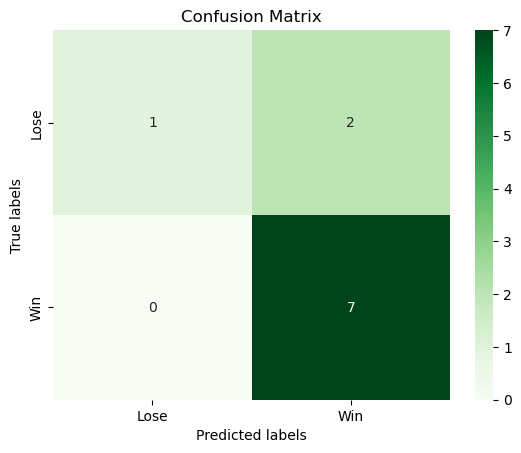

In [13]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

The confusion matrix shows how we have an 80% accuracy with the test data. Here we can see that when Jalen wins a game, the prediction model is always correct (7/7). But when Jalen loses a game, the prediction made is wrong 66% of the time. Only one loss was correctly predicted. In total 8/10 predictions were accurate and 2/10 were not. This is a problem of false positives. Lets see if a different model works better.

Next we will use a Support Vector Machine (SVM).

In [14]:
parameters = {'kernel':('linear','poly','rbf', 'sigmoid'),'C':[0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1, 1]}
svm = SVC()

svm_cv = GridSearchCV(estimator = svm, cv = 8, param_grid = parameters)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=8, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [15]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
accuracy : 0.74375


In [16]:
print("accuracy of test data:", svm_cv.score(X_test, Y_test))

accuracy of test data: 0.8


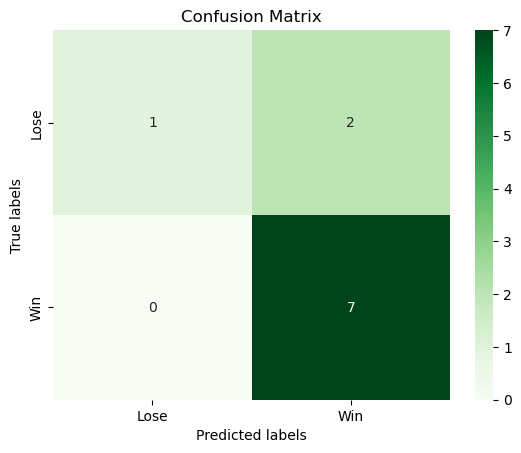

In [17]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Using a Support Vector Machine, we get the same result as the Logisitic Regression model. An 80% accuracy on the test data with the same false positives being predicted. 

Next we will use Decision Tree Classifier. 

In [18]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [n for n in range(1,10)],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'max_features': [None , 'sqrt', 'log2']}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(estimator = tree, cv = 8, param_grid = parameters)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [19]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.90625


In [20]:
print("accuracy on test data:", tree_cv.score(X_test, Y_test))

accuracy on test data: 0.8


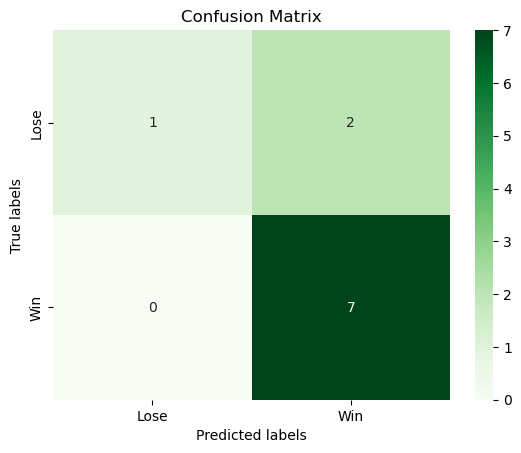

In [21]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

While the decision tree had a better accuracy by far when determining the best score, the accuracy of the test data was the same at 80%. The same false positives were recorded. 

In [22]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'weights': ['uniform', 'distance'],
              'p': [1, 2],
              'metric': ['euclidean', 'manhattan'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
              }

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(estimator = KNN, cv = 8, param_grid = parameters)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=8, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [23]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
accuracy : 0.775


In [24]:
print("accuracy of test data:", knn_cv.score(X_test, Y_test))

accuracy of test data: 0.8


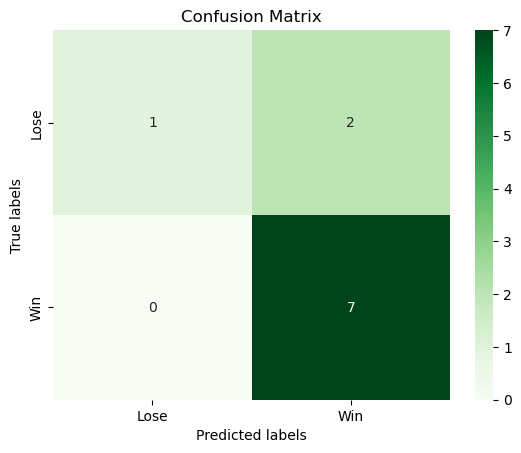

In [25]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

The same false positives were predicted. 

Since every model recorded the same accuracy for test data and the same false positives, I am inclined to believe these 2 loses are outliers and should have been wins based on the understood data. Other factors most liikely made the team lose such as lack of defensive presence, missed scoring opportunities from other players, etc.

In [26]:
print("Model\t\tAccuracy\tTestAccuracy")#,logreg_cv.best_score_)
print("LogReg\t\t{}\t\t{}".format((logreg_cv.best_score_).round(5), logreg_cv.score(X_test, Y_test).round(5)))
print("SVM\t\t{}\t\t{}".format((svm_cv.best_score_).round(5), svm_cv.score(X_test, Y_test).round(5)))
print("Tree\t\t{}\t\t{}".format((tree_cv.best_score_).round(5), tree_cv.score(X_test, Y_test).round(5)))
print("KNN\t\t{}\t\t{}".format((knn_cv.best_score_).round(5), knn_cv.score(X_test, Y_test).round(5)))

comparison = {}

comparison['LogReg'] = {'Accuracy': logreg_cv.best_score_.round(5), 'TestAccuracy': logreg_cv.score(X_test, Y_test).round(5)}
comparison['SVM'] = {'Accuracy': svm_cv.best_score_.round(5), 'TestAccuracy': svm_cv.score(X_test, Y_test).round(5)}
comparison['Tree'] = {'Accuracy': tree_cv.best_score_.round(5), 'TestAccuracy': tree_cv.score(X_test, Y_test).round(5)}
comparison['KNN'] = {'Accuracy': knn_cv.best_score_.round(5), 'TestAccuracy': knn_cv.score(X_test, Y_test).round(5)}


Model		Accuracy	TestAccuracy
LogReg		0.75		0.8
SVM		0.74375		0.8
Tree		0.90625		0.8
KNN		0.775		0.8


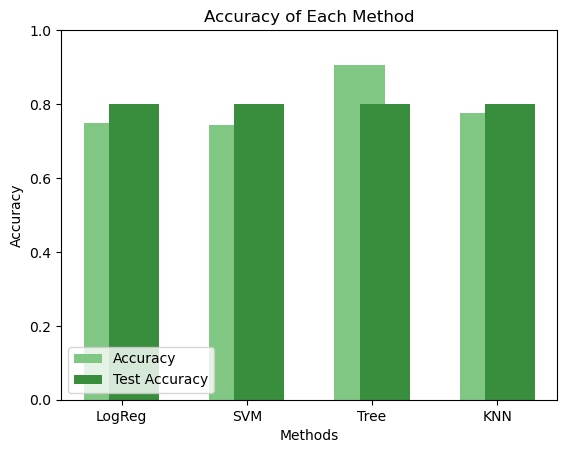

In [27]:
x = []
y1 = []
y2 = []
for meth in comparison.keys():
    x.append(meth)    
    y1.append(comparison[meth]['Accuracy'])
    y2.append(comparison[meth]['TestAccuracy'])
    

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.1, y1, 0.4, label = 'Accuracy', color = '#81C784')
plt.bar(x_axis + 0.1, y2, 0.4, label = 'Test Accuracy', color = '#388E3C')

plt.ylim([0,1])
plt.xticks(x_axis, x)

plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Accuracy of Each Method")
plt.legend(loc='lower left')
plt.show()

The Decision Tree Classifier was the best model. All Test accuracy were the same due to the false positives. The Accuracy of the tests showed that the DTC model was most accurate. 